In [1]:
import numpy as np
import os
import random

In [14]:
all_list = []
dirs = os.listdir('train')
f = open('train_classid.txt', 'w')
for index,dir in enumerate(dirs):
    print (index, dir, file=f)
    items = os.listdir('train/' + dir)
    for item in items:
        all_list.append('train/' + dir + '/' + item + ' ' + str(index))
f.close()

In [15]:
import random
random.shuffle(all_list)

In [16]:
f = open('train_list.txt','w')
for item in all_list:
    print(item, file=f)
f.close()

In [17]:
all_list = []
dirs = os.listdir('test')
f = open('test_classid.txt', 'w')
for index,dir in enumerate(dirs):
    print (index, dir, file=f)
    items = os.listdir('test/' + dir)
    for item in items:
        all_list.append('test/' + dir + '/' + item + ' ' + str(index))
f.close()

random.shuffle(all_list)

f = open('test_list.txt','w')
for item in all_list:
    print(item, file=f)
f.close()

In [6]:
all_list = []
dirs = os.listdir('../test_new_domain')
for index,dir in enumerate(dirs):
    items = os.listdir('../test_new_domain/' + dir)
    for num, item in enumerate(items):
        if num < 20:
            all_list.append('test_new_domain/' + dir + '/' + item + ' ' + str(index))

random.shuffle(all_list)

f = open('test_transfer_20.txt','w')
for item in all_list:
    print(item, file=f)
f.close()

In [11]:
from PIL import Image
f = open('train_list.txt').readlines()
for i in range(7520-80,7600+80):
    line = f[i].strip().split()[0]
    img = Image.open('/mnt/lustre/dingmingyu/Research/da_zsl/dataset/imagenet/' + line)
    img.convert('RGB')
    print(i)

7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639


In [2]:
from PIL import Image
f = open('train_list.txt').readlines()
for i in range(len(f)):
    if i%4000==0:
        print(i)
    line = f[i].strip().split()[0]
    try:
        img = Image.open('/mnt/lustre/dingmingyu/Research/da_zsl/dataset/imagenet/' + line)
        img.convert('RGB')
    except:
        print(i,line)

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
52000
56000
60000
64000
68000


/mnt/lustre/dingmingyu/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


72000
76000
80000
84000
88000
92000
96000
100000
104000
108000
112000
116000
120000
124000
128000
132000
136000
140000
144000
148000
152000
156000
160000
164000
168000
172000
176000
180000
184000
188000
188268 train/n02074367/n02074367_1933.JPEG
192000
196000


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.manifold import TSNE

In [12]:
f_fea_0_2_tra = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_train_CDANE_fc_0.2_fff.txt').readlines()])

In [9]:
f_emb_0_2 = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_train_CDANE_fc_noloss.txt').readlines()])

In [13]:
f_emb_0_2_val = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_val_CDANE_fc_noloss.txt').readlines()])

In [16]:
f_emb_0_2_val.shape

(400, 512)

In [14]:
f_fea_0_2_val = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_val_CDANE_fc_0.2_fff.txt').readlines()])

In [15]:
tsne=TSNE()

In [20]:
X_embedded = tsne.fit_transform(np.vstack([f_emb_0_2_val,f_emb_0_2[:400]]))

In [21]:
labels = [1]*400 + [0]* 400

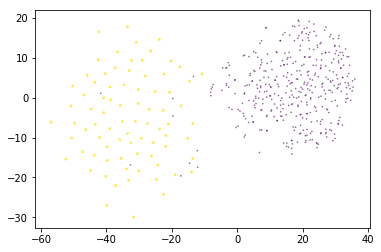

In [24]:
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()

In [25]:
X_embedded = tsne.fit_transform(np.vstack([f_fea_0_2_val,f_fea_0_2[:400]]))

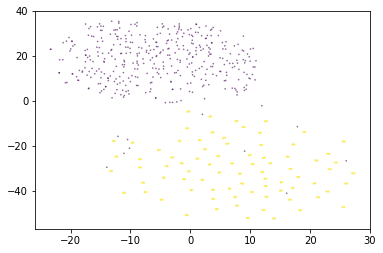

In [27]:
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()

In [28]:
f_emb_0_0_tra = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_train_CDANE_fc_noloss_0.0.txt').readlines()])

In [29]:
f_emb_0_0_val = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('mini_val_CDANE_fc_noloss_0.0.txt').readlines()])

In [30]:
X_embedded = tsne.fit_transform(np.vstack([f_emb_0_0_val,f_emb_0_0_tra[:400]]))

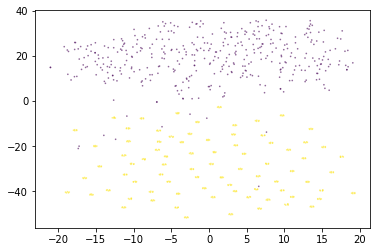

In [31]:
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()

In [5]:
domain_emb_0_0_tra = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('domain_train_CDANE.txt').readlines()[:1375]])

In [3]:
domain_emb_0_0_val = np.array([[float(xx) for xx in item.strip().split()[:-1]] for item in open('domain_val_CDANE.txt').readlines()])

In [4]:
domain_emb_0_0_val.shape

(1375, 512)

In [9]:
tsne=TSNE()
X_embedded = tsne.fit_transform(np.vstack([domain_emb_0_0_val,domain_emb_0_0_tra]))

In [10]:
labels = [1]*1375 + [0]* 1375

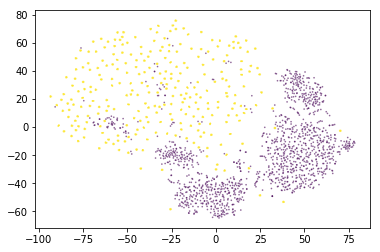

In [11]:
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()

In [4]:
mini_fea_0_2_tra = np.array([[float(xx) for xx in item.strip().split()] for item in open('mini_train_CDANE_fc_0.2_fff.txt').readlines()[:1000]])

In [8]:
f = open('mini_train_CDANE_fc_0.2_fff.txt').readlines()
import random 
random.shuffle(f)
mini_fea_0_2_tra = np.array([[float(xx) for xx in item.strip().split()] for item in f[:1000]])

In [9]:
tsne=TSNE()
X_embedded = tsne.fit_transform(mini_fea_0_2_tra[:,:-1])

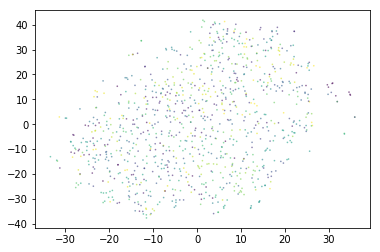

In [10]:
labels = mini_fea_0_2_tra[:,-1]
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()

In [12]:
f = open('mini_train_CDANE_fc_noloss_0.0_fff.txt').readlines()
import random 
random.shuffle(f)
mini_fea_0_0_tra = np.array([[float(xx) for xx in item.strip().split()] for item in f[:1000]])

In [13]:
tsne=TSNE()
X_embedded = tsne.fit_transform(mini_fea_0_0_tra[:,:-1])

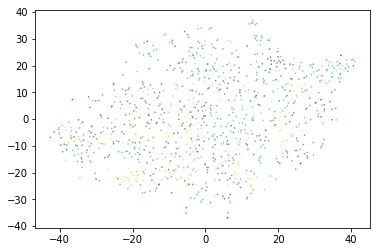

In [14]:
labels = mini_fea_0_0_tra[:,-1]
plt.figure()
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels, s=0.5, alpha = 0.5)

plt.show()